In [16]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import datetime

In [17]:
file='sim_factory_2x5_random.csv'
cols=['Timestamp',\
      'Plant','PlantStatus','PlantYield', 'PlantDefectiveProducts','PlantEnergyConsumption (kW)', \
      'Machine','MachineStatus','MachineEnergyConsumption (kW)', 'MachineFaultProb', 'MachineBreakDownProb', 'MachineDefectsRate', 'MachineYield', 'MachineNoise' ,\
      'MachineCyclicMaintenance','MachineCorrectiveMaintenance','MachineProactiveMaintenance']

In [18]:
df = pd.read_csv(file, low_memory=False, names=cols)
df

,Timestamp,Plant,PlantStatus,PlantYield,PlantDefectiveProducts,PlantEnergyConsumption (kW),Machine,MachineStatus,MachineEnergyConsumption (kW),MachineFaultProb,MachineBreakDownProb,MachineDefectsRate,MachineYield,MachineNoise,MachineCyclicMaintenance,MachineCorrectiveMaintenance,MachineProactiveMaintenance
0,2020-01-01 01:00:00,p1,1,1500.0,75.0,5000.0,m1,OK,1141.227023,0.005,0.0001,0.009147,1501.523971,0,NaN,NaN,NaN
1,2020-01-01 01:00:00,p1,1,1500.0,75.0,5000.0,m2,OK,887.784129,0.005,0.0001,0.010119,1495.262269,0,NaN,NaN,NaN
2,2020-01-01 01:00:00,p1,1,1500.0,75.0,5000.0,m3,OK,965.069166,0.005,0.0001,0.010184,1500.630027,0,NaN,NaN,NaN
3,2020-01-01 01:00:00,p1,1,1500.0,75.0,5000.0,m4,OK,1057.818697,0.005,0.0001,0.011822,1500.314886,0,NaN,NaN,NaN
4,2020-01-01 01:00:00,p1,1,1500.0,75.0,5000.0,m5,OK,954.713329,0.005,0.0001,0.009033,1501.696316,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193145,2022-03-15 19:00:00,p2,0,0.0,0.0,0.0,m1,OK,1054.234598,0.005,0.0001,0.012007,1501.294549,0,NaN,NaN,NaN
193146,2022-03-15 19:00:00,p2,0,0.0,0.0,0.0,m2,OK,973.043164,0.005,0.0001,0.008125,1500.472302,0,NaN,NaN,NaN
193147,2022-03-15 19:00:00,p2,0,0.0,0.0,0.0,m3,OK,1118.648324,0.005,0.0001,0.008009,1501.163120,0,NaN,NaN,NaN
193148,2022-03-15 19:00:00,p2,0,0.0,0.0,0.0,m4,NONOK,1134.165679,0.000,0.0020,0.028062,1489.946908,1,NaN,NaN,PROACTIVE00318


In [19]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df=df.fillna('-')

In [20]:
df1=df[df['Timestamp']<datetime.datetime.strptime('2021-01-01','%Y-%m-%d')]
df2=df[( df['Timestamp']>=datetime.datetime.strptime('2021-01-01','%Y-%m-%d')) & (df['Timestamp']<datetime.datetime.strptime('2022-01-01','%Y-%m-%d'))]

## Number of Maintenance Interventions

In [21]:
def get_maintenance_number(df,column,control_df):
    maint=df[column].unique()
    try:
        n_maint=int(maint[-1][-5:]) -1 
    except:
        n_maint=0
    try:
        init_maint=int(control_df[column].unique()[-1][-5:]) -1
        control_maint=control_df[column]
        maint = [m for m in maint if m not in control_maint]
        n_maint=int(maint[-1][-5:]) -1  - init_maint
    except:
        print('no need to check previous timeframe')
    
    return n_maint

In [22]:
height=[]    
maint_type=['MachineCyclicMaintenance','MachineCorrectiveMaintenance','MachineProactiveMaintenance']
height.append(get_maintenance_number(df1,maint_type[0],None))
height.append(get_maintenance_number(df1,maint_type[1],None))
height.append(get_maintenance_number(df1,maint_type[2],None))
height.append(get_maintenance_number(df2,maint_type[0],df1))
height.append(get_maintenance_number(df2,maint_type[1],df1))
height.append(get_maintenance_number(df2,maint_type[2],None))

no need to check previous timeframe
no need to check previous timeframe
no need to check previous timeframe
no need to check previous timeframe


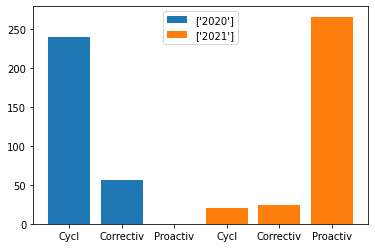

In [23]:
plt.figure()
maint_label=[ t.strip('Machine').strip('Maintenance') for t in maint_type]

plt.bar([1,2,3], height[:3], width=0.8, align='center', tick_label=['Cyclic','Corrective','Proactive' ],label=['2020'])
plt.bar([4,5,6], height[3:], width=0.8, align='center', label=['2021'])
plt.legend()
plt.xticks([1,2,3,4,5,6],[t for t in maint_label]*2)
plt.show()

## Cost of Maintenance Interventions

In [24]:
corrective_cost = 20000
regular_maintenance_cost =2000

In [25]:
cost=[m * regular_maintenance_cost for m in height]
cost[1]=cost[1]*corrective_cost/regular_maintenance_cost
cost[4]=cost[4]*corrective_cost/regular_maintenance_cost

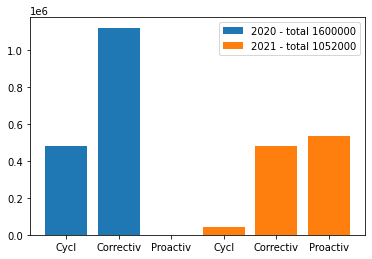

In [26]:
plt.figure()
maint_label=[ t.strip('Machine').strip('Maintenance') for t in maint_type]

plt.bar([1,2,3], cost[:3], width=0.8, align='center', tick_label=['Cyclic','Corrective','Proactive' ],label='2020 - total '+str(int(np.sum(cost[:3]))))
plt.bar([4,5,6], cost[3:], width=0.8, align='center',label='2021 - total '+str(int(np.sum(cost[3:]))))
plt.legend()
plt.xticks([1,2,3,4,5,6],[t for t in maint_label]*2)
plt.show()

## Cost of Maintenance per Product

In [27]:
yield_20=df1[['Timestamp','Plant','PlantYield']].drop_duplicates()['PlantYield'].sum()
yield_21=df2[['Timestamp','Plant','PlantYield']].drop_duplicates()['PlantYield'].sum()
print(yield_20,yield_21)

16731468.37427209 18211186.65948069


In [28]:
cost_per_product= [cost[i]/yield_20 for i in range(3) ]+[cost[i]/yield_21 for i in range(3,6) ]

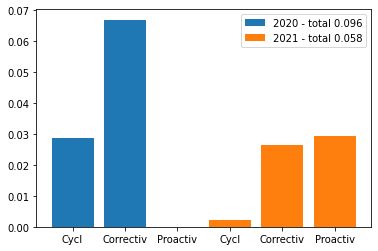

In [29]:
plt.figure()
maint_label=[ t.strip('Machine').strip('Maintenance') for t in maint_type]

plt.bar([1,2,3], cost_per_product[:3], width=0.8, align='center', tick_label=['Cyclic','Corrective','Proactive' ],label='2020 - total '+str(np.round(np.sum(cost_per_product[:3]),3)))
plt.bar([4,5,6], cost_per_product[3:], width=0.8, align='center',label='2021 - total '+str(np.round(np.sum(cost_per_product[3:]),3)))
plt.legend()
plt.xticks([1,2,3,4,5,6],[t for t in maint_label]*2)
plt.show()

## Dayly Trends

In [41]:
df['year_month']=df['Timestamp'].apply(lambda x: str(x.year)+'-'+str(x.month).zfill(2))
df

,Timestamp,Plant,PlantStatus,PlantYield,PlantDefectiveProducts,PlantEnergyConsumption (kW),Machine,MachineStatus,MachineEnergyConsumption (kW),MachineFaultProb,MachineBreakDownProb,MachineDefectsRate,MachineYield,MachineNoise,MachineCyclicMaintenance,MachineCorrectiveMaintenance,MachineProactiveMaintenance,date,year_month
0,2020-01-01 01:00:00,p1,1,1500.0,75.0,5000.0,m1,OK,1141.227023,0.005,0.0001,0.009147,1501.523971,0,-,-,-,2020-01-01,2020-01
1,2020-01-01 01:00:00,p1,1,1500.0,75.0,5000.0,m2,OK,887.784129,0.005,0.0001,0.010119,1495.262269,0,-,-,-,2020-01-01,2020-01
2,2020-01-01 01:00:00,p1,1,1500.0,75.0,5000.0,m3,OK,965.069166,0.005,0.0001,0.010184,1500.630027,0,-,-,-,2020-01-01,2020-01
3,2020-01-01 01:00:00,p1,1,1500.0,75.0,5000.0,m4,OK,1057.818697,0.005,0.0001,0.011822,1500.314886,0,-,-,-,2020-01-01,2020-01
4,2020-01-01 01:00:00,p1,1,1500.0,75.0,5000.0,m5,OK,954.713329,0.005,0.0001,0.009033,1501.696316,0,-,-,-,2020-01-01,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193145,2022-03-15 19:00:00,p2,0,0.0,0.0,0.0,m1,OK,1054.234598,0.005,0.0001,0.012007,1501.294549,0,-,-,-,2022-03-15,2022-03
193146,2022-03-15 19:00:00,p2,0,0.0,0.0,0.0,m2,OK,973.043164,0.005,0.0001,0.008125,1500.472302,0,-,-,-,2022-03-15,2022-03
193147,2022-03-15 19:00:00,p2,0,0.0,0.0,0.0,m3,OK,1118.648324,0.005,0.0001,0.008009,1501.163120,0,-,-,-,2022-03-15,2022-03
193148,2022-03-15 19:00:00,p2,0,0.0,0.0,0.0,m4,NONOK,1134.165679,0.000,0.0020,0.028062,1489.946908,1,-,-,PROACTIVE00318,2022-03-15,2022-03


In [42]:
plant_cols=[ c for c in cols if 'Plant' in c ]
machine_cols=[ c for c in cols if 'Machine' in c ]

In [43]:
energy_df=df[df['PlantStatus']==1]

In [44]:
energy_df=df.groupby(['date','Plant','Machine'],as_index=False)['MachineEnergyConsumption (kW)'].sum()

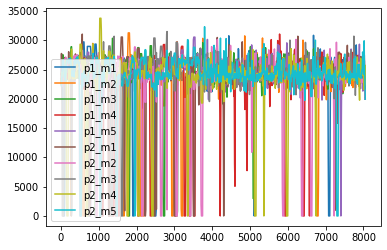

In [45]:
energy_df
for p in energy_df['Plant'].unique():
    mydf=energy_df[energy_df['Plant']==p]
    for m in mydf['Machine'].unique():
        machinedf=mydf[mydf['Machine']==m]
        plt.plot(machinedf['MachineEnergyConsumption (kW)'],label=p+'_'+m)
plt.legend()
    

In [46]:
dfw=df.drop_duplicates(subset=['Timestamp']+plant_cols)
dfw

,Timestamp,Plant,PlantStatus,PlantYield,PlantDefectiveProducts,PlantEnergyConsumption (kW),Machine,MachineStatus,MachineEnergyConsumption (kW),MachineFaultProb,MachineBreakDownProb,MachineDefectsRate,MachineYield,MachineNoise,MachineCyclicMaintenance,MachineCorrectiveMaintenance,MachineProactiveMaintenance,date,year_month
0,2020-01-01 01:00:00,p1,1,1500.000000,75.000000,5000.000000,m1,OK,1141.227023,0.005,0.0001,0.009147,1501.523971,0,-,-,-,2020-01-01,2020-01
5,2020-01-01 01:00:00,p2,1,1497.118719,73.969566,5011.801709,m1,OK,1049.254952,0.005,0.0001,0.011987,1500.142330,0,-,-,-,2020-01-01,2020-01
10,2020-01-01 02:00:00,p1,1,1500.000000,75.000000,5000.000000,m1,OK,916.507065,0.005,0.0001,0.009777,1496.524158,0,-,-,-,2020-01-01,2020-01
15,2020-01-01 02:00:00,p2,1,1494.316075,78.119729,4733.642599,m1,OK,983.694637,0.005,0.0001,0.009174,1495.163685,0,-,-,-,2020-01-01,2020-01
20,2020-01-01 03:00:00,p1,1,1500.000000,75.000000,5000.000000,m1,OK,1043.911146,0.005,0.0001,0.008468,1503.586489,0,-,-,-,2020-01-01,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193125,2022-03-15 17:00:00,p2,0,0.000000,0.000000,0.000000,m1,OK,1054.234598,0.005,0.0001,0.012007,1501.294549,0,-,-,-,2022-03-15,2022-03
193130,2022-03-15 18:00:00,p1,1,1493.977928,70.159200,5050.995912,m1,OK,971.926155,0.005,0.0001,0.009728,1495.524452,0,-,-,-,2022-03-15,2022-03
193135,2022-03-15 18:00:00,p2,0,0.000000,0.000000,0.000000,m1,OK,1054.234598,0.005,0.0001,0.012007,1501.294549,0,-,-,-,2022-03-15,2022-03
193140,2022-03-15 19:00:00,p1,1,1493.977928,70.159200,5050.995912,m1,OK,1010.547204,0.005,0.0001,0.009436,1497.840564,0,-,-,-,2022-03-15,2022-03


In [47]:
dfw=dfw.groupby(['year_month','Plant'],as_index=False)['PlantYield','PlantDefectiveProducts','PlantEnergyConsumption (kW)'].sum()
dfw['EffectiveYield']=dfw['PlantYield']-dfw['PlantDefectiveProducts']

/var/folders/k0/x2j2_8855vj36bx6g9mnmcs00000gn/T/ipykernel_37787/1692417469.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfw=dfw.groupby(['year_month','Plant'],as_index=False)['PlantYield','PlantDefectiveProducts','PlantEnergyConsumption (kW)'].sum()


In [48]:
dfw['EnergyCons_PP']=dfw['PlantEnergyConsumption (kW)']/dfw['EffectiveYield']

In [49]:
dfw

,year_month,Plant,PlantYield,PlantDefectiveProducts,PlantEnergyConsumption (kW),EffectiveYield,EnergyCons_PP
0,2020-01,p1,844099.837910,71846.721444,2.854604e+06,772253.116466,3.696461
1,2020-01,p2,684394.926961,70290.916905,2.414821e+06,614104.010056,3.932267
2,2020-02,p1,757105.338297,84527.175172,2.659161e+06,672578.163125,3.953683
3,2020-02,p2,834503.286670,96010.312386,2.981546e+06,738492.974285,4.037339
4,2020-03,p1,589685.917416,61916.380539,2.051096e+06,527769.536877,3.886347
5,2020-03,p2,730591.308259,68588.457887,2.555045e+06,662002.850372,3.859569
6,2020-04,p1,594336.543304,49757.809678,2.035655e+06,544578.733627,3.738037
7,2020-04,p2,697791.659043,72182.176662,2.460453e+06,625609.482381,3.932889
8,2020-05,p1,532166.336521,52552.499628,1.875980e+06,479613.836893,3.911439
9,2020-05,p2,551749.708694,50988.152588,1.935737e+06,500761.556105,3.865585


/var/folders/k0/x2j2_8855vj36bx6g9mnmcs00000gn/T/ipykernel_37787/2488292074.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newlabels, rotation=45)


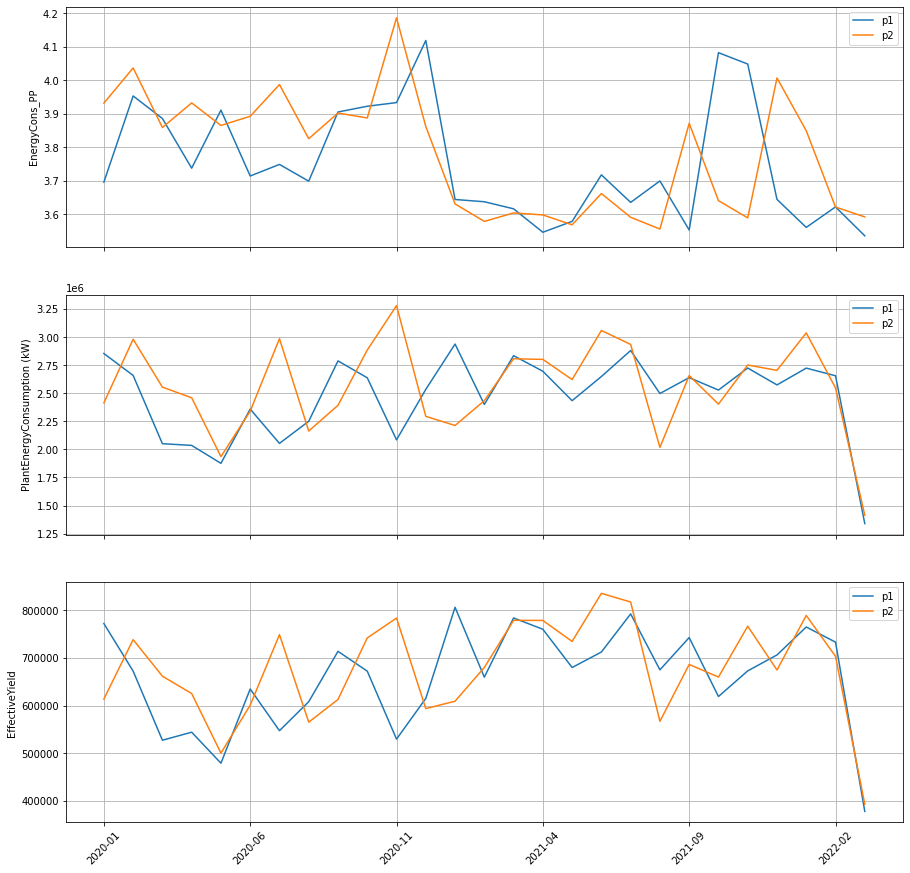

In [60]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(3, 1, sharex=True, figsize=(15,15))
measures = ['EnergyCons_PP','PlantEnergyConsumption (kW)','EffectiveYield']

for i, m in enumerate(measures):
    for p in dfw['Plant'].unique():
        ax=axs[i]
        mydf=dfw[dfw['Plant']==p]
        ax.plot(mydf[m].values , label=p )
        #ax.set_ylim((0,dfw[m].max()+10))
        ax.set_ylabel(m)
    ax.legend()
    ax.grid()


labels = [item.get_text() for item in ax.get_xticklabels()]
newlabels=[]
for i,l in enumerate(labels):
    try:
        newlabels.append(mydf.year_month.values[int(ax.get_xticks()[i])])
    except:
        newlabels.append('')
        
ax.set_xticklabels(newlabels, rotation=45)

plt.show()

In [56]:
mydf.year_month.values[1]

'2020-02'

In [59]:
int(ax.get_xticks()[2])

5

In [40]:
dfw[dfw['EnergyCons_PP']>6]

,date,Plant,PlantYield,PlantDefectiveProducts,PlantEnergyConsumption (kW),EffectiveYield,EnergyCons_PP
1073,2021-06-20,p2,0.000000,0.000000,7843.101226,0.000000,inf
1075,2021-06-21,p2,11946.677118,707.823758,112369.379894,11238.853360,9.998296
1275,2021-09-29,p2,0.000000,0.000000,76994.502524,0.000000,inf
1277,2021-09-30,p2,0.000000,0.000000,97732.870234,0.000000,inf
1279,2021-10-01,p2,0.000000,0.000000,32200.383076,0.000000,inf
1282,2021-10-03,p1,0.000000,0.000000,30448.244479,0.000000,inf
1284,2021-10-04,p1,0.000000,0.000000,81195.318611,0.000000,inf
1286,2021-10-05,p1,0.000000,0.000000,81195.318611,0.000000,inf
1288,2021-10-06,p1,13412.962932,647.523393,100475.327822,12765.439539,7.870887
1314,2021-10-19,p1,0.000000,0.000000,8191.037163,0.000000,inf


In [37]:
mydf['week']=mydf['year_week'].apply(lambda x: x[-3:])

/var/folders/k0/x2j2_8855vj36bx6g9mnmcs00000gn/T/ipykernel_68028/3727043400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['week']=mydf['year_week'].apply(lambda x: x[-3:])


In [43]:
mydf[ (mydf['week'] > 'w50') | (mydf['week']<'w02') ]

,year_week,Plant,PlantYield,PlantDefectiveProducts,PlantEnergyConsumption (kW),EffectiveYield,EnergyCons_PP,week
1,2020w01,p2,98546.783103,6601.567894,334218.165636,91945.215209,3.634971,w01
101,2020w51,p2,73047.816386,7673.206055,256076.301283,65374.610331,3.917060,w51
103,2020w52,p2,250534.591842,22712.864181,871795.355222,227821.727661,3.826656,w52
105,2020w53,p2,110389.751921,8854.552792,380889.802422,101535.199129,3.751308,w53
107,2021w01,p2,76161.281943,5037.568670,260502.862759,71123.713273,3.662672,w01
207,2021w51,p2,159796.178243,10793.787157,585525.716028,149002.391086,3.929640,w51
209,2021w52,p2,59755.437171,2979.758778,413690.010996,56775.678394,7.286395,w52
211,2021w53,p2,76062.597034,6040.084623,262753.610939,70022.512411,3.752416,w53
213,2022w01,p2,206061.022888,14253.143331,714989.287348,191807.879557,3.727633,w01
235,2022w52,p2,0.000000,0.000000,198367.489257,0.000000,inf,w52


In [41]:
mydf[mydf['week']>'w50']

,year_week,Plant,PlantYield,PlantDefectiveProducts,PlantEnergyConsumption (kW),EffectiveYield,EnergyCons_PP,week
101,2020w51,p2,73047.816386,7673.206055,256076.301283,65374.610331,3.917060,w51
103,2020w52,p2,250534.591842,22712.864181,871795.355222,227821.727661,3.826656,w52
105,2020w53,p2,110389.751921,8854.552792,380889.802422,101535.199129,3.751308,w53
207,2021w51,p2,159796.178243,10793.787157,585525.716028,149002.391086,3.929640,w51
209,2021w52,p2,59755.437171,2979.758778,413690.010996,56775.678394,7.286395,w52
211,2021w53,p2,76062.597034,6040.084623,262753.610939,70022.512411,3.752416,w53
235,2022w52,p2,0.000000,0.000000,198367.489257,0.000000,inf,w52


In [ ]:
mydf[mydf['week']0']

In [ ]:
[ dfw['year_week'][t] for t in ax.get_xticks()[:]]

In [ ]:
ax.get_xticks()[1:-2]

In [ ]:
plt.axfigure()
dfw['EnergyCons_PP'].plot()
plt.

In [ ]:
dfw['PlantEnergyConsumption (kW)'].plot()

In [ ]:
dfw['EffectiveYield'].plot()

In [ ]:
dfw[['PlantEnergyConsumption (kW)','EffectiveYield','EnergyCons_PP']]

In [ ]:
df[df['year_week']>'2021w48'].head(1000)